In [447]:
# %pip install pandas 
# %pip install scikit-learn 
# %pip install matplotlib 
# %pip install seaborn

In [448]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

In [449]:
def missingGraph(dataset, output_folder='missingGraph'):
    """
    Generate a bar plot illustrating the percentage of missing values in categorical and numerical features of a dataset.

    Parameters:
    - dataset (pd.DataFrame): The input dataset.
    - output_folder (str): The folder where the output plot image will be saved. Default is 'missingGraph'.

    Returns:
    None

    The function identifies categorical and numerical features, calculates the percentage of missing values for each feature,
    and creates a bar plot to visualize the missing values. The plot is saved as an image file in the specified output folder.
    """

# Separate features into categorical and numerical
    categorical_features = dataset.select_dtypes(include=['object']).columns.tolist()
    numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
# Display the identified categorical and numerical features
    print("Categorical Features:")
    print(categorical_features)
    print("\nNumerical Features:")
    print(numerical_features)

# Calculate the percentage of missing values for each feature
    missing_percentage = (dataset.isnull().sum() / len(dataset)) * 100
    categorical_missing = missing_percentage[categorical_features]
    numerical_missing = missing_percentage[numerical_features]

# Create a bar plot for missing values in categorical and numerical features
    _, ax = plt.subplots(figsize=(10, 6))
    ax.bar(categorical_missing.index, categorical_missing, color='blue', label='Categorical')
    ax.bar(numerical_missing.index, numerical_missing, color='orange', label='Numerical')

# Set labels and title for the plot
    ax.set_xlabel('Column Name')
    ax.set_ylabel('Percentage of Missing Values')
    ax.set_title('Percentage of Missing Values in Categorical and Numerical Features')
    ax.legend()

# Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()

# Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)
    
# Save the plot as an image file in the specified output folder
    output_path = os.path.join(output_folder, f'missingGraph.png')
    plt.savefig(output_path)
    
# Close the plot to free up resources
    plt.close()

In [450]:
def distributionPlots(dataset, output_folder='plots'):
    """
    Generate distribution plots for numerical features in the dataset.

    Parameters:
    - dataset (pd.DataFrame): The input dataset.
    - output_folder (str): Folder to save the distribution plots. Default is 'plots'.

    Returns:
    None

    This function loops through each numerical feature in the dataset, creating a distribution plot (histogram with kernel density estimate) for each. The individual plots are saved as image files in the specified output folder.
    """

# Select numerical features from the dataset
    numerical_features = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
# Loop through each numerical feature to create distribution plots
    for feature in numerical_features:
    # Create a new figure and axis for each feature
        _, ax = plt.subplots(figsize=(10, 6))
        
    # Use Seaborn to create a histogram with a kernel density estimate (kde)
        sns.histplot(data=dataset, x=feature, kde=True)
        
    # Set title for the plot
        ax.set_title(f'Distribution Plot - {feature}')
        
    # Adjust layout for better visualization
        plt.tight_layout()
        
    # Create the output folder if it doesn't exist
        os.makedirs(output_folder, exist_ok=True)
        
    # Save the plot as an image file in the specified output folder
        output_path = os.path.join(output_folder, f'{feature}.png')
        plt.savefig(output_path)
        
    # Close the plot to free up resources
        plt.close()

In [451]:
def outlierBoxplots(dataset, columns, output_folder='outlierBoxPlots'):
    """
    Create a combined boxplot for specified columns in the dataset to visually identify outliers.

    Parameters:
    - dataset (pd.DataFrame): The input dataset.
    - columns (list): List of column names for which a combined boxplot is to be created.
    - output_folder (str): Folder to save the combined boxplot image. Default is 'outlierBoxPlots'.
    
    Returns:
    None
    
    This function generates a single boxplot that combines boxplots for the specified columns, allowing for a visual identification of outliers. The combined boxplot image is saved in the specified output folder.
    """

    # Create the output folder if it doesn't exist
    os.makedirs(output_folder, exist_ok=True)

    # Create a new figure and axis for the combined boxplot
    fig, ax = plt.subplots(figsize=(14, 8))

    # Use Seaborn to create a boxplot for each specified column on the same axes
    sns.boxplot(data=dataset[columns], ax=ax)

    # Set title for the plot
    ax.set_title('Combined Boxplot for Outlier Detection')

    # Rotate x-axis labels for better visibility
    plt.xticks(rotation=45, ha='right')

    # Adjust layout for better visualization
    plt.tight_layout()

    # Save the combined boxplot as an image file in the specified output folder
    output_path = os.path.join(output_folder, 'combined_boxplot.png')
    plt.savefig(output_path)

    # Close the plot to free up resources
    plt.close()

In [452]:
def iqr(df):
    """
    Remove outliers from the input DataFrame using the Interquartile Range (IQR) method.

    Parameters:
    - df (pd.DataFrame): The input DataFrame.

    Returns:
    - df_cleaned (pd.DataFrame): DataFrame with outliers removed.
    """

    # Display the shape of the original dataset
    print("Shape of dataset:", df.shape)

    # Select numerical features for outlier detection
    numerical_features = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

    # Calculate quartiles and IQR
    Q1 = df[numerical_features].quantile(0.25)
    Q3 = df[numerical_features].quantile(0.75)
    IQR = Q3 - Q1

    # Detect outliers using IQR
    outliers = ((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)

    # Remove outliers
    df_cleaned = df[~outliers]

    # Display the shape of the dataset after removing outliers
    print("Shape of IQR_dataset:", df_cleaned.shape)

    return df_cleaned

In [453]:
def preprocess_data(dataset):
    """
        Perform preprocessing on the input dataset, including conversion of the 'Date' column to datetime and then to integer, dropping specific columns ('year' and 'Total Bags'), reordering columns with 'AveragePrice' at the end, handling outliers using the Interquartile Range (IQR) method, and one-hot encoding certain columns.

        Parameters:
        - dataset (pd.DataFrame): The input dataset.

        Returns:
        - X (numpy.ndarray): Independent variables after preprocessing.
        - Y (numpy.ndarray): Dependent variable after preprocessing.
        - dataset_cleaned (pd.DataFrame): Cleaned dataset after preprocessing.
    """

    # Convert 'Date' column to datetime and then to integer
    dataset['Date'] = pd.to_datetime(dataset['Date']).astype(int)

    # Drop the 'year' and 'Total Bags' columns
    # `year` is dropped because, `year` is already present in the column `Date`
    # `Total Bags` is dropped because, the sum of `Small Bags`, `Large Bags`, and `XLarge Bags` gives `Total Bags`
    dataset = dataset.drop(columns=['year', 'Total Bags'])

    # Reorder columns placing 'AveragePrice' at the end
    dataset = dataset[['Date'] + list(dataset.columns[3:]) + ['AveragePrice']]

    # Separate independent (X) and dependent (Y) variables
    X = dataset.iloc[:, :-1].values
    Y = dataset.iloc[:, -1].values

    # Label encode the columns `type (-2)` in X
    labelencoder_X1 = LabelEncoder()
    dataset['type'] = labelencoder_X1.fit_transform(dataset['type'])

    # One-hot encode the 'region' column
    onehotencoder = OneHotEncoder(sparse_output=False)
    region_encoded = onehotencoder.fit_transform(dataset['region'].values.reshape(-1,1))
    
    unique_regions = []
    for i in dataset['region']:
        if i not in unique_regions:
            unique_regions.append(i)

    region_encoded_df = pd.DataFrame(region_encoded, columns=[f"{region}" for region in unique_regions])
    dataset = pd.concat([dataset, region_encoded_df], axis=1)
    dataset.drop(['region'], axis=1, inplace=True)

    # Create a copy of the dataset for further modifications
    pre_processed_dataset = dataset.copy()

    # Drop the 'AveragePrice' column temporarily
    pre_processed_dataset = pre_processed_dataset.drop(['AveragePrice'], axis=1)

    # Move the 'AveragePrice' column to the last position
    pre_processed_dataset['AveragePrice'] = Y

    # Save the pre-processed dataset to CSV
    pre_processed_dataset.to_csv('avocado_pre_processed.csv', index=False)

In [454]:
def exploratoryAnalysis(dataset):
    """
    Perform analysis on the given dataset, answering specific questions and displaying relevant graphs.

    Parameters:
    - dataset (pd.DataFrame): The input dataset.

    Returns:
    None
    """

    def question1(dataset):
    # Convert 'Date' to datetime format
        dataset['Date'] = pd.to_datetime(dataset['Date'])
        types_columns = ['4046', '4225', '4770']
        yearly_averages = dataset.groupby(dataset['Date'].dt.year)[types_columns].mean()

    # Display bar graph for average values
        _, ax = plt.subplots(figsize=(14, 8))
        yearly_averages.plot(kind='bar', ax=ax)
        plt.title("Average of '4046', '4225', '4770' for Each Year")
        plt.xlabel('Year')
        plt.ylabel('Average Quantity')
        plt.show()

    def question2(dataset):
    # Convert 'Date' to datetime format
        dataset['Date'] = pd.to_datetime(dataset['Date'])
        types_columns = ['4046', '4225', '4770']
        yearly_averages = dataset.groupby(dataset['Date'].dt.year)[types_columns].sum()

    # Display bar graph for average values
        _, ax = plt.subplots(figsize=(14, 8))
        yearly_averages.plot(kind='bar', ax=ax)
        plt.title("Total of '4046', '4225', '4770' for Each Year")
        plt.xlabel('Year')
        plt.ylabel('Total Quantity')
        plt.show()

    def question3(dataset):
        import random
        selected_place = random.choice(list(dataset.columns)[9:64])

    # Selecting columns related to bags and place
        bag_columns = ['Small Bags', 'Large Bags', 'XLarge Bags']

    # Filter rows where the selected place column has value 1
        filtered_dataset = dataset[dataset[selected_place].eq(1)]

    # Calculate average bags for the filtered dataset
        avg_bags = filtered_dataset[bag_columns].mean()

    # Display bar graph for average bags with different colors
        _, ax = plt.subplots(figsize=(14, 8))
        colors = ['skyblue', 'lightgreen', 'lightcoral']
        ax.bar(bag_columns, avg_bags, color=colors)
        plt.title(f"Average Bags for {selected_place}")
        plt.xlabel('Bags')
        plt.ylabel('Average Quantity')
        plt.show()
    
    def question4(dataset):
        selected_columns = list(dataset.columns)[9:63]

        plt.figure(figsize=(14, 8))

    # Lists to store x-axis labels and corresponding max average prices
        x_labels = []
        max_prices_list = []

    # Loop through each selected column
        for selected_place in selected_columns:
        # Filter rows where the selected place column has value 1
            filtered_dataset = dataset[dataset[selected_place].eq(1)]

        # Find the maximum AveragePrice for each column
            max_price = filtered_dataset['AveragePrice'].max()

        # Append the column name and max price to the lists
            x_labels.append(selected_place)
            max_prices_list.append(max_price)

    # Plot as a line graph
        plt.plot(x_labels, max_prices_list, marker='o', linestyle='-', color='b')
        plt.title("Maximum Price for each selected place where the value is 1")
        plt.xlabel("Region")
        plt.xticks(rotation=45, ha='right')
        plt.ylabel('Maximum AveragePrice')

        plt.show()

    def question5(dataset):
        type_counts = dataset['type'].value_counts()

    # Create a pie chart
        plt.figure(figsize=(8, 8))
        plt.pie(type_counts, labels=type_counts.index, autopct='%1.3f%%', startangle=90, colors=['skyblue', 'lightgreen'])
        plt.title('Distribution of Conventional and Organic Types')
        plt.show()
    
    dataset_temp = dataset
    question1(dataset_temp) # Question: Total average number of each category of avocados sold in a year

    dataset_temp = dataset
    question2(dataset_temp) # Question: Total average number of each category of avocados sold in a year

    dataset_temp = dataset
    question3(dataset_temp) # Question: Bags vs Place

    dataset_temp = dataset
    question4(dataset_temp) # Question: Region vs AveragePrice

    dataset_temp = dataset
    question5(dataset_temp) # Question: Count the number of conventional and organic avocados in the 'type' column

In [455]:
def main():
    """
    The main function that performs various data analysis tasks on the avocado dataset.

    1. Reads the 'avocado.csv' dataset.
    2. Generates a missing data visualization using `missingGraph`.
    3. Creates distribution plots using `distributionPlots`.
    4. Generates outlier boxplots for numerical columns using `outlierBoxplots`.
    5. Remove the outliers using IQR
    6. Preprocesses the data using `preprocess_data`.
    7. Reads the pre-processed dataset from 'avocado_pre_processed.csv'.
    8. Performs exploratory analysis on the pre-processed dataset using `exploratoryAnalysis`.
    """
    
    dataset = pd.read_csv('avocado.csv')
    missingGraph(dataset)
    distributionPlots(dataset)
    outlierBoxplots(dataset, list(dataset.select_dtypes(include=['int64', 'float64']).columns))

    iqr(dataset)
    preprocess_data(dataset)

    dataset = pd.read_csv('avocado_pre_processed.csv')
    exploratoryAnalysis(dataset)

Shape of dataset: (18249, 14)
Shape of IQR_dataset: (11538, 14)


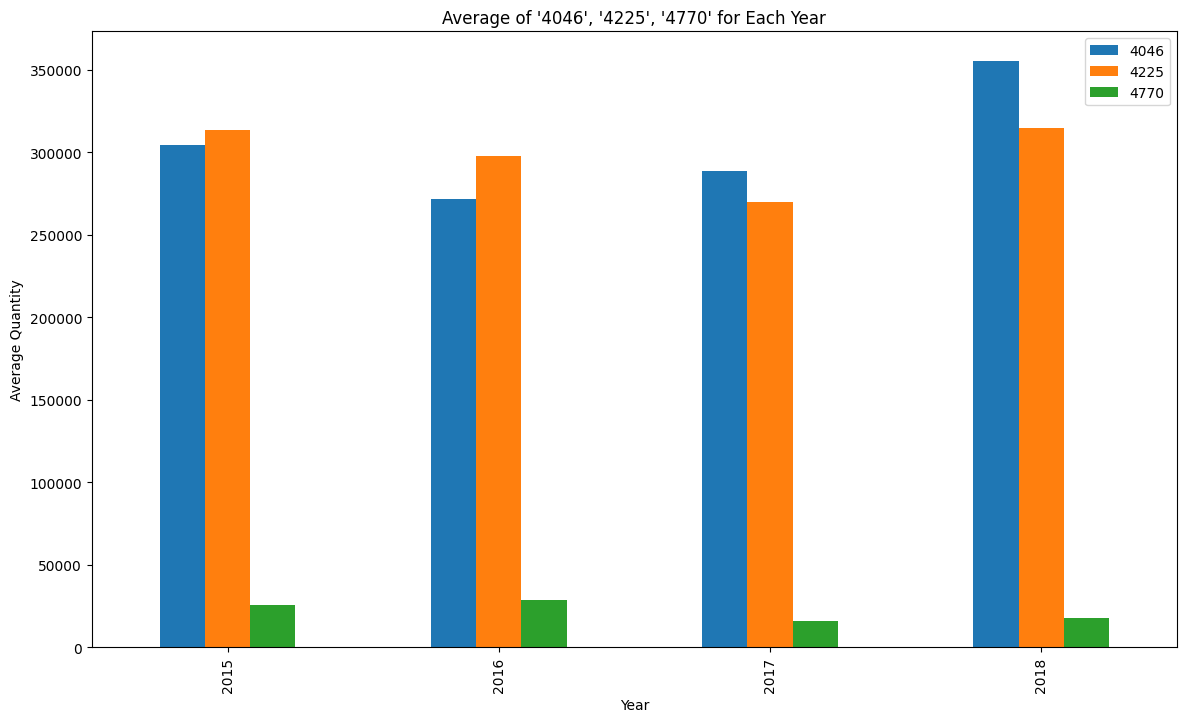

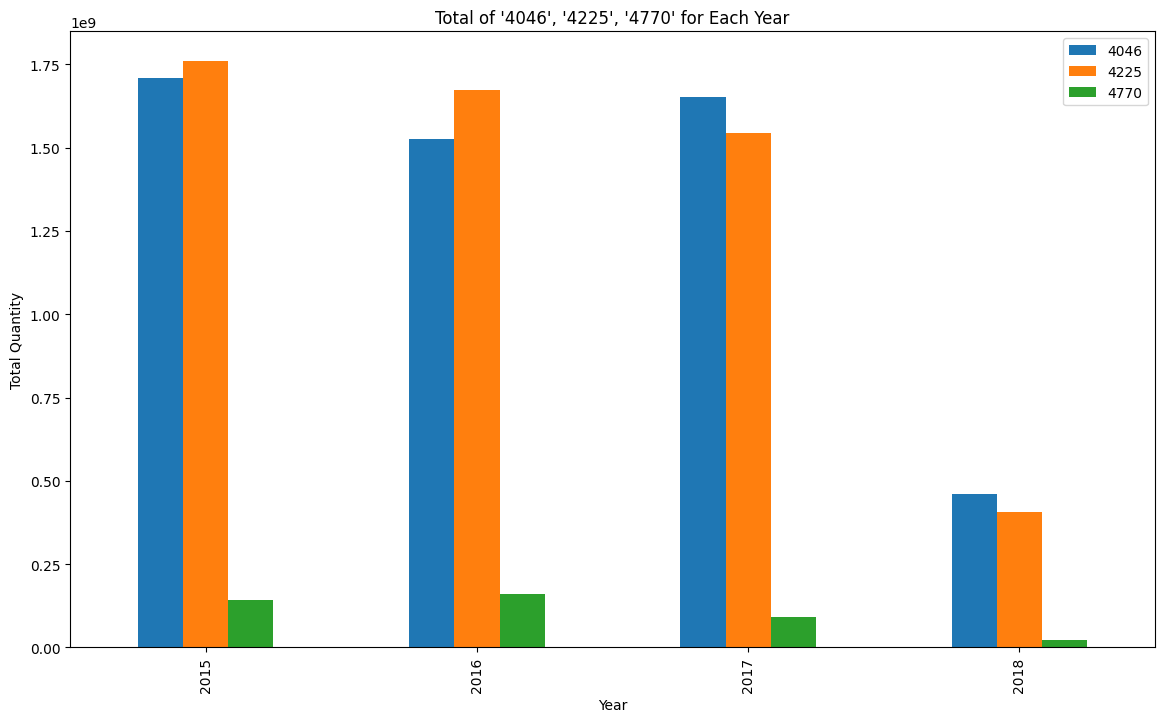

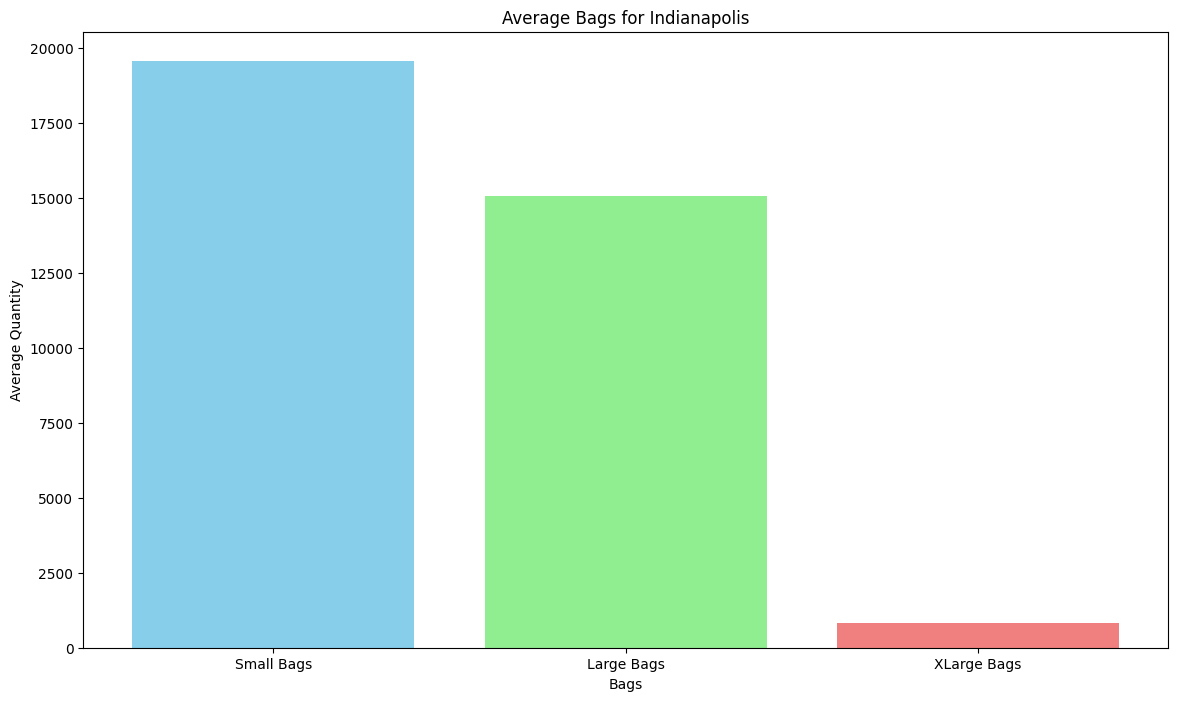

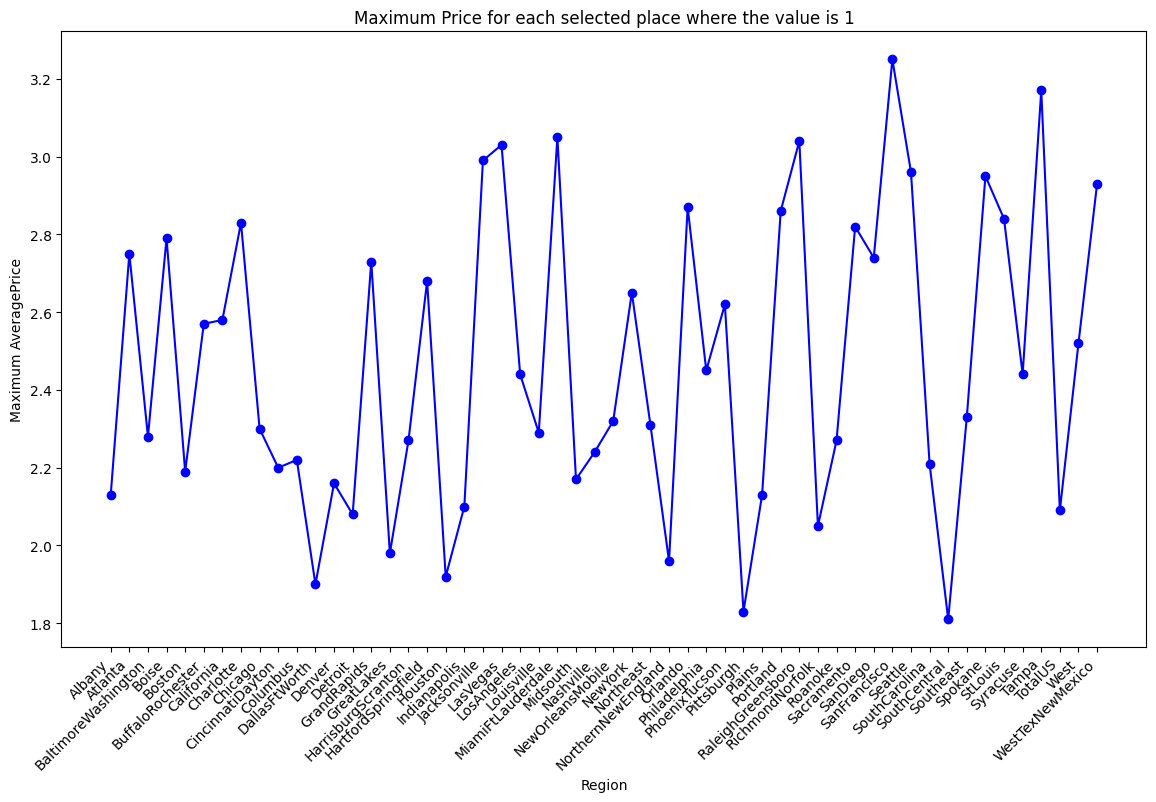

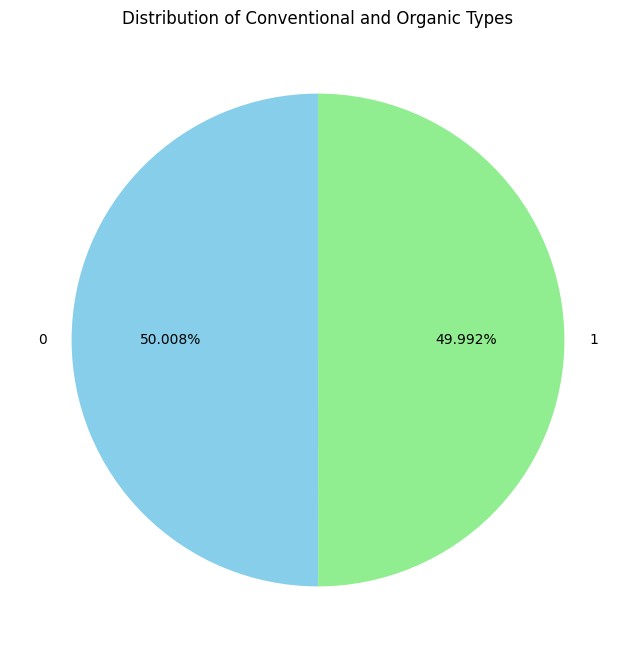

In [456]:
if __name__ == '__main__':
    main()